🔍 First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0   

🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    i

<ipython-input-5-2b94ab73fa16>:70: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


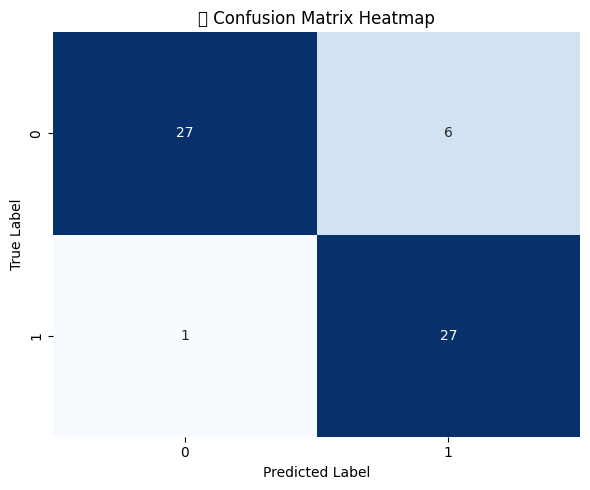


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61

✅ Accuracy: 88.52%
✅ Precision: 81.82%
✅ Recall: 96.43%
✅ F1 Score: 88.52%


<ipython-input-5-2b94ab73fa16>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
<ipython-input-5-2b94ab73fa16>:91: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


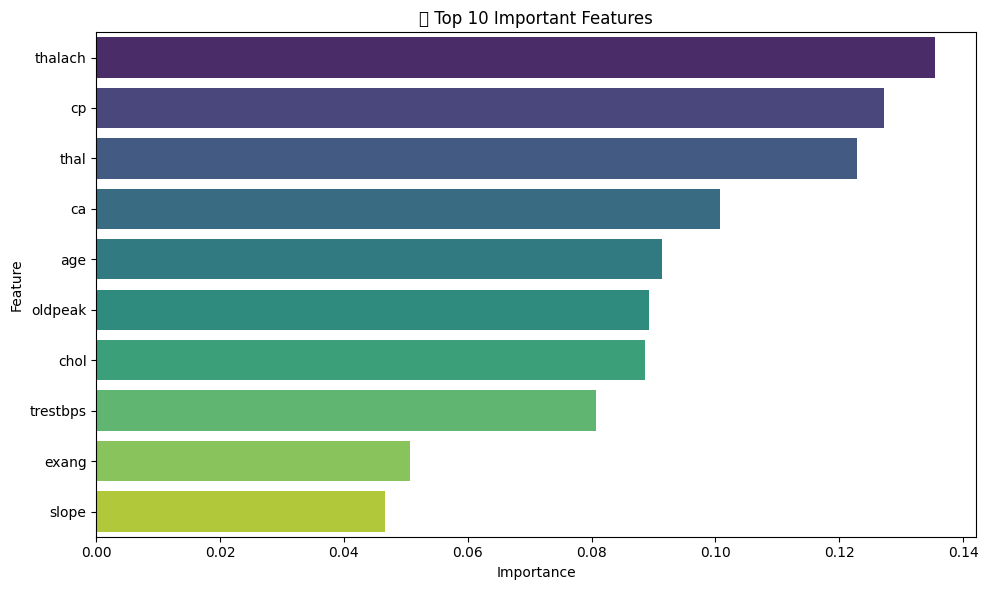

In [5]:
# 📦 Install required packages if running in a fresh Colab environment
# Uncomment if needed
# !pip install seaborn matplotlib scikit-learn pandas

# 🧪 Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# 📥 Load the dataset
df = pd.read_csv("/content/4. Predict Heart Disease.csv")

# 🕵‍♂ Quick inspection
print("🔍 First 5 rows of the dataset:")
print(df.head(), "\n")

print("🧾 Dataset Info:")
df.info()

print("\n📉 Missing values check:")
print(df.isnull().sum(), "\n")

# 🧼 Preprocessing
# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
target_column = 'target'  # Change this if your target column is named differently
X = df.drop(target_column, axis=1)
y = df[target_column]

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🔁 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 🔮 Prediction
y_pred = model.predict(X_test_scaled)

# 📊 Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("📘 Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 📈 Evaluation Metrics
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("✅ Precision: {:.2f}%".format(precision_score(y_test, y_pred, average='binary') * 100))
print("✅ Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='binary') * 100))
print("✅ F1 Score: {:.2f}%".format(f1_score(y_test, y_pred, average='binary') * 100))

# 📌 Optional: Feature Importances
importances = model.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('🔍 Top 10 Important Features')
plt.tight_layout()
plt.show()